In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
 click <a href="javascript:code_toggle()">here</a> to hide the raw code.''')

# study the numerical convergence
* 2x4x1  resol  64/H, 128/H and 256/H  
* Pm = 1, Re = 4000 fixed 


<type 'float'>
Run x2y4z1r64pm1re4000: <alpha> =  0.0942088849063 0.0258583330719 0.120067217978
Run x2y4z1r128pm1re4000: <alpha> =  0.109934813 0.0269628239937 0.136897636994
Run x2y4z1r256pm1re4000: <alpha> =  0.0908353741875 0.0211945005812 0.112029874769
Run x2y4z1r256pm1re8000: <alpha> =  0.185281931348 0.0364529512959 0.221734882644
Run x2y4z1r512pm1re16000: <alpha> =  0.255741469578 0.0456552051537 0.301396674731
Run x2y4z1r512pm1re8000: <alpha> =  0.192884705316 0.0374567762583 0.230341481574


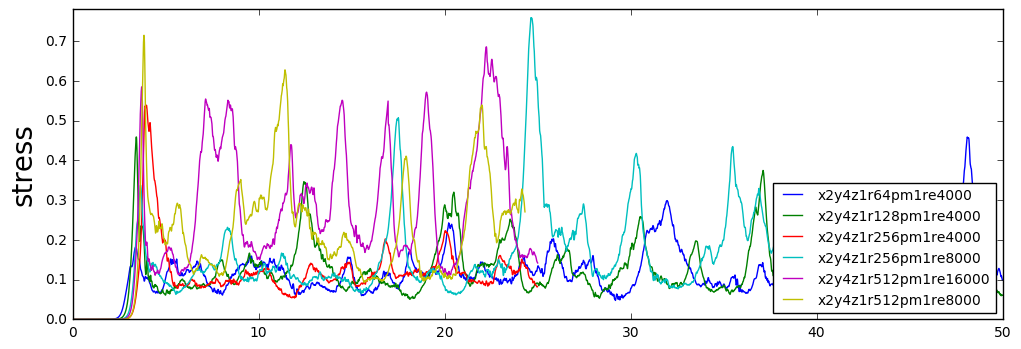

In [198]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def time_trim(ahist):
  count = 0; tmp = np.copy(ahist)
  for i in np.arange(1,len(ahist['time'])):
    if ahist['time'][i] > tmp['time'][count]:
      tmp['time'][count+1] = ahist['time'][i]
      tmp['em1'][count+1] = ahist['em1'][i]
      tmp['em2'][count+1] = ahist['em2'][i]
      tmp['em3'][count+1] = ahist['em3'][i]
      tmp['maxwell'][count+1] = ahist['maxwell'][i]
      tmp['reynolds'][count+1] = ahist['reynolds'][i]
      count +=1
  #print "finishing counting count= ",count
  tt  = tmp['time'][0:count]
  em1 = tmp['em1'][0:count]
  em2 = tmp['em2'][0:count]
  em3 = tmp['em3'][0:count]
  maxwell  = tmp['maxwell'][0:count]
  reynolds = tmp['reynolds'][0:count]
  return tt,em1,em2,em3,maxwell,reynolds

direname='/tigress/jiming/reconnect/athena/bin/'
basename='Unstra.out2.'
appdname='athdf'
histname='Unstra.hst'

omg=1.0
rho0=1.0
cs = 1.0
pres = rho0*cs**2
torb=2.*np.pi/omg

#list of target
targlist=[  'x2y4z1r64pm1re4000', 'x2y4z1r128pm1re4000',\
            'x2y4z1r256pm1re4000','x2y4z1r256pm1re8000',\
            'x2y4z1r512pm1re16000','x2y4z1r512pm1re8000']
Lx,Ly,Lz=2.0,4.0,1.0
volume= Lx*Ly*Lz
print type(volume)
first_time=True
# load default history dump
matplotlib.rcParams['figure.figsize'] = (12,4)
for targname in targlist:
    fname=direname+targname+'/'+histname
    dtype1 = np.dtype([('time', 'f8'), ('em1', 'f8'),('em2','f8'),('em3','f8'),('maxwell','f8'),('reynolds','f8')])
    ahist = np.loadtxt(fname, dtype=dtype1, skiprows=2, usecols=(0,9,10,11,12,13))
    tt,em1,em2,em3,maxwell,reynolds = time_trim(ahist)
#     plt.plot(ahist['time']/torb,(ahist['maxwell']+ahist['reynolds'])/pres/volume,label=targname)
#     size=int(len(ahist['maxwell'])*0.25)
#     print 'Run '+targname+': <alpha> = ',np.average(ahist['maxwell'][size:])/pres/volume, \
#                                          np.average(ahist['reynolds'][size:])/pres/volume, \
#                                          np.average(ahist['maxwell'][size:]+ahist['reynolds'][size:])/pres/volume
    plt.plot(tt/torb,(maxwell+reynolds)/pres/volume,label=targname)
    size=int(len(maxwell)*0.2)
    if targname == 'x2y4z1r256pm1re8000':
        size =int(len(maxwell)*0.6)
    print 'Run '+targname+': <alpha> = ',np.average(maxwell[size:])/pres/volume, \
                                         np.average(reynolds[size:])/pres/volume, \
                                         np.average(maxwell[size:]+reynolds[size:])/pres/volume
    #plt.plot(ahist['time']/torb,ahist['reynolds']/pres/volume,label='reynolds')
#plt.yscale('log')
plt.ylim([0,0.78])
plt.xlim([0,50])
#plt.xlabel('Orbits',fontsize=20)
plt.ylabel('stress',fontsize=20)
plt.legend(fontsize=10,loc=4)

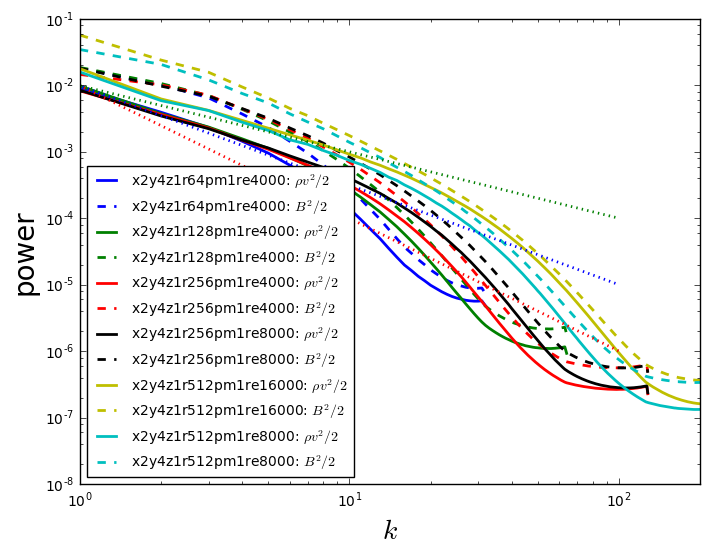

In [195]:
from powerspectra.pspec import get_pspec1dall
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

prefac = 4.*np.pi*2*4*1
clist = ['b','g','r','k','y','c']
cnt = 0
matplotlib.rcParams['figure.figsize'] = (8,6)
for targname in targlist:
  ts,te,tstride=50,100,1
  if targname[6:9] == 'r64':
    nkx,nky,nkz = 64,63,32
  if targname[6:10] == 'r128':
    nkx,nky,nkz = 128,126,64
  if targname[6:10] == 'r256':
    nkx,nky,nkz,ts,te,tstride=256,252,128,30,51,1
  if targname[6:10] == 'r512':
    nkx,nky,nkz,ts,te,tstride=512,504,256,30,51,1
  if targname[-4:] == '8000':
    ts,te,tstride= 25,49,1
  if targname[-4:] == '8000' and targname[6:10] == 'r512':
    ts,te,tstride= 25,27,1
  if targname[-5:] == '16000':
    ts,te,tstride= 25,40,1
  ## pwra -shell_int kinetic; pwrb - shell_int magnetic
  ## pwrax - yz_int kinetic along kx axis etc.
  k,kx,ky,kz,pwra,pwrb,pwrax,pwrbx,pwray,pwrby,pwraz,pwrbz = get_pspec1dall(targname,nkx,nky,nkz,ts,te,tstride)
  plt.plot(k,pwra*prefac,'-'+clist[cnt],lw=2,label=targname+': '+r'$\rho v^2/2$')
  plt.plot(k,pwrb*prefac,'--'+clist[cnt],lw=2,label=targname+': '+r'$B^2/2$')
  cnt +=1
plt.xscale('log')
plt.yscale('log')
plt.xlim([1,200])
plt.ylim([1e-8,0.1])
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel('power',fontsize=20)
amp = 0.01
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1.5),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-1),':',lw=2)
plt.plot(np.arange(0,100,0.1),amp*np.arange(0.01,100,0.1)**(-2),':',lw=2)
plt.legend(fontsize=10,loc=3)


# get the current sheet lists 

| Run Name             | duration(orbits) | $\alpha_M$| $\alpha_R$ | $\alpha_{tot}$ | $\langle J^2\rangle$/$\langle J^2\rangle$$_{sh}$| # of jsheet(>10) | dimensions |
| ---------------------|:----:|:------:|:-----:|:---------:|:-------------------:|:----------------:|:-----------:|
|<s>x2y4z1r64pm1re4000</s>  |50 |  | 0.0948 |0.0258 |0.1206 | 0.1226  | 109 | (0.448,0.141,0.048)|
|x2y4z1r128pm1re4000   | 50|0.1093  |0.0269 |0.1362 | 0.0950 | 341 | (0.275,0.099,0.031)|
|x2y4z1r256pm1re4000   | 25|0.0916  |0.0211 |0.1127 | 0.0804 | 691 | (0.202,0.077,0.0234) |
|x2y4z1r256pm1re8000   | 40 |0.1853  |0.0365 |0.2217 | 0.0734 |    |   |  |
|x2y4z1r512pm1re8000   |25 | 0.1929 |0.0375 |0.2303 |  |
|x2y4z1r512pm1re16000   |25| 0.2557| 0.0457 | 0.3014| 0.0471 |

In [4]:
import main
fdir =  '/tigress/jiming/reconnect/athena/bin/'
for i in range(3):
  if i==0:
    fname=fdir+'x2y4z1r64pm1re4000/Unstra.out2.00100.athdf'
  if i==1:
    fname=fdir+'x2y4z1r128pm1re4000/Unstra.out2.00100.athdf'
  if i==2:
    fname=fdir+'x2y4z1r256pm1re4000/Unstra.out2.00050.athdf'
  bx,by,bz,j2 = main.loadData(fname)
  main.findCurrentSheet(j2,fname)

time =  314.15926
time =  314.15926
time =  314.15926
============ start to find current sheet ===============
after  8  iterations: 
find threshold current sheet magnitude
jth^2 =  836.103360736  0.25*qdiss_tot =  42751329.8741  actual qdiss =  42972370.1943
time cost for the estimate jth:  0.0132911205292  seconds
identified  1060  current sheets in total!
time cost for the identify features:  0.0137281417847  seconds
time cost:  0.118864059448  seconds
time cost for argwhere =  0.005539894104
time cost for populating =:  0.0106658935547  seconds
time cost for sorting    =  0.000450134277344  seconds
first top 5 largest sheets:  [7186, 1596, 1463, 1366, 1217]
# of sheets poccess more than 10 cells:  109
time cost for pickle dump:  0.792840957642  seconds
time =  314.15926
time =  314.15926
time =  314.15926
============ start to find current sheet ===============
after  8  iterations: 
find threshold current sheet magnitude
jth^2 =  1096.54739468  0.25*qdiss_tot =  391000563.35  actu

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
%matplotlib notebook
def plot_ninesheets(jlist_sorted,xlim=1024,ylim=2048,zlim=512):
    #show the first six sheets largest in size
    nframe = 3
    nplot  = 3
    matplotlib.rcParams['figure.figsize'] = (10, 10.0*nframe/nplot)
    fig = plt.figure()
    fraction=0.046;pad=0.04
    stride = 10
    gs = gridspec.GridSpec(3, 3)
    for i in range(0,9):
      locs = np.array(jlist_sorted[i].keys())
      nlocs = len(locs[:,0])
      ax = fig.add_subplot(gs[i], projection='3d')
      ax.scatter(locs[0:nlocs:stride,2], locs[0:nlocs:stride,1], locs[0:nlocs:stride,0],marker='s',c='c',s=10)
      ax.set_xlim3d(0, xlim-1)
      ax.set_ylim3d(0, ylim-1)
      ax.set_zlim3d(0, zlim-1)

      ax.set_xlabel('X')
      ax.set_ylabel('Y')
      ax.set_zlabel('Z')
      ax.text(-100, ylim, zlim, str(nlocs), zdir=None,color='b',size=20)
      ax.view_init(elev=60, azim=230)

    plt.tight_layout()


time cost for pickling =:  7.28855895996  seconds


<IPython.core.display.Javascript object>


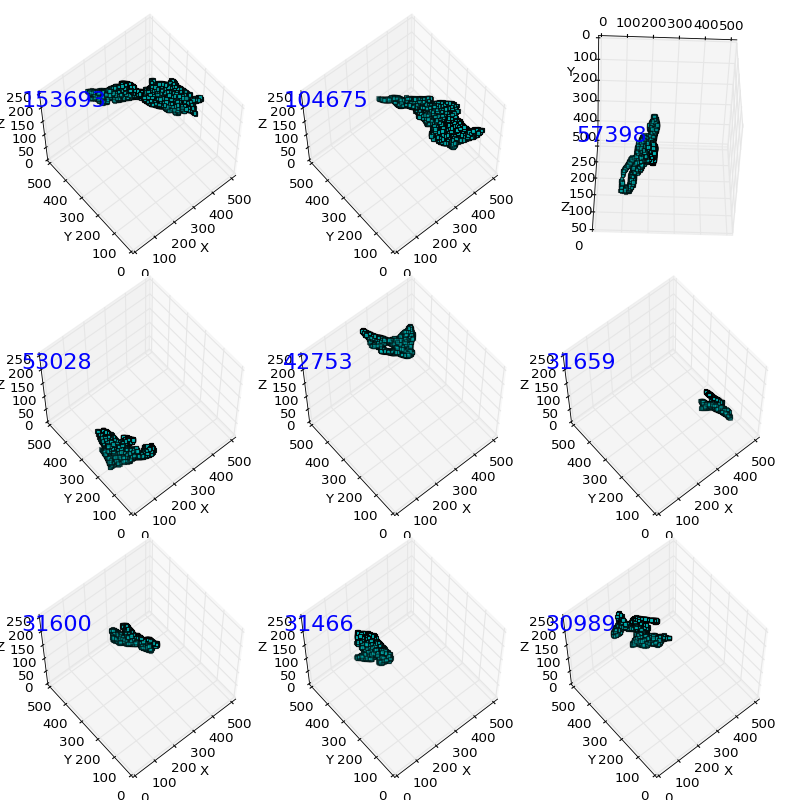

In [3]:
import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

fdir = '/tigress/jiming/reconnect/athena/bin/'
fname = fdir+'x2y4z1r256pm1re4000/Unstra.out2.00050.athdf'+'.jlist.p'
tstart = time.time()
import cPickle as pickle
jlist_sorted = pickle.load( open(fname, "rb" ) )
tend = time.time()
print 'time cost for pickling =: ',tend-tstart,' seconds'
plot_ninesheets(jlist_sorted,xlim=512,ylim=504,zlim=256)

In [18]:
import main
import athena_read as ath
import numpy as np

import time
import multiprocessing as mp
from itertools import product
import sys
from sklearn.decomposition import PCA

fdir =  '/tigress/jiming/reconnect/athena/bin/'
for i in [2]:
  if i==0:
    fname=fdir+'x2y4z1r64pm1re4000/Unstra.out2.00100.athdf'
  if i==1:
    fname=fdir+'x2y4z1r128pm1re4000/Unstra.out2.00100.athdf'
  if i==2:
    fname=fdir+'x2y4z1r256pm1re4000/Unstra.out2.00050.athdf'
  t,data = ath.athdf(fname,quantities=['x1f','x2f','x3f'])
  
  def get_xcenter(x1f,x2f,x3f):
    x = x1f+0.5*(x1f[1]-x1f[0])
    y = x2f+0.5*(x2f[1]-x2f[0])
    z = x3f+0.5*(x3f[1]-x3f[0])
    return x[:-1],y[:-1],z[:-1]
  
  x,y,z = get_xcenter(data['x1f'],data['x2f'],data['x3f'])
  nlist = len(jlist_sorted)
  pca = PCA(n_components=3)
  nlim,eta = 27,2.5e-4

  # only consider sheet with more than 27 grid points
  nlist = np.max([i for i in range(nlist) if len(jlist_sorted[i])>(nlim-1)])

  dx = x[1]-x[0]
  dy = y[1]-y[0]
  dz = z[1]-z[0]
  dv = dx*dy*dz

  def dimensions_jsheet(num):
    js = jlist_sorted[num]
    locs = np.array(js.keys())
    xlocs = np.array(zip(z[locs[:,0]],y[locs[:,1]],x[locs[:,2]]))

    if (len(xlocs[:,0])<nlim):
      #print 'reach < ',nlim
      return [0,0,0,(0,0,0)]
    else:
      #(1) num of cells in given sheet
      ncell = len(js)
      #(2) find j_max
      maxj = np.max(np.array(js.values()))
      #(3) compute dissipation \epsilon
      eps  = np.sum(eta*np.array(js.values()))*dv
      #(4) compute (lambda,xi,l)
      # pca.fit(locs)
      pca = PCA(n_components=3).fit(xlocs)
      i1 = pca.components_[0]; i2= pca.components_[1]; i3 = pca.components_[2]
      d1 = np.array([xlocs[i,:].dot(i1) for i in range(0,len(locs[:,0]))])
      d2 = np.array([xlocs[i,:].dot(i2) for i in range(0,len(locs[:,0]))])
      d3 = np.array([xlocs[i,:].dot(i3) for i in range(0,len(locs[:,0]))])
      # dimensions of the sheet
      L1 = np.max([(max(d1)-min(d1)),dx])
      L2 = np.max([(max(d2)-min(d2)),dx])
      L3 = np.max([(max(d3)-min(d3)),dx])
      return [ncell,maxj,eps,(L1,L2,L3),(d1,d2,d3)]

#create a pool and map the target function with multi-arguments
tstart = time.time()

npr = 8
p = mp.Pool(processes=npr)
result = p.map(dimensions_jsheet,range(nlist),chunksize=npr)

p.close()
p.join()

tend = time.time()
print 'time spent with ',str(npr), ' processors = ', tend-tstart, ' seconds'

ncells = [result[i][0] for i in range(nlist)]
jmax   = [result[i][1] for i in range(nlist)]
diss   = [result[i][2] for i in range(nlist)]
size   = [result[i][3] for i in range(nlist)]
orient = [result[i][4] for i in range(nlist)]


time =  157.07963
time spent with  8  processors =  6.18923020363  seconds


## plot the statistics

<IPython.core.display.Javascript object>


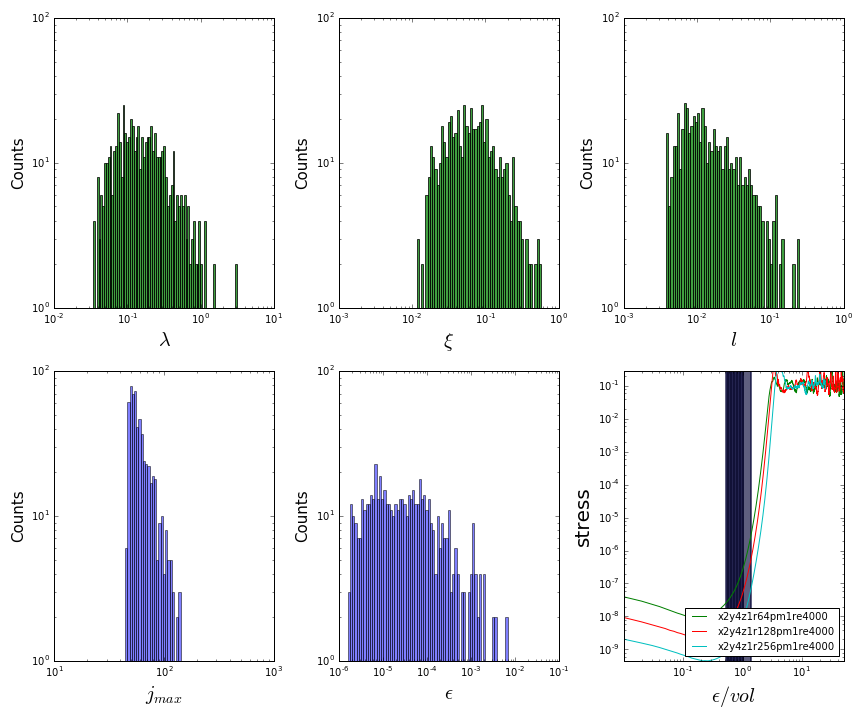

In [48]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib notebook

jth= np.sqrt(2019.56911523)
#print size
nframe = 2
nplot  = 3
matplotlib.rcParams['figure.figsize'] = (12, 15.0*nframe/nplot)
fig = plt.figure()
fraction=0.046;pad=0.04
gs = gridspec.GridSpec(2, 3)
for i in np.arange(6):
  if (i==0):
    hdata = np.array(size)[:,0]
    vmin=-2; vmax=0.5  #in log10
    nbins = 100
    xlab = r'$\lambda$'
  if (i==1):
    hdata = np.array(size)[:,1]
    vmin=-3;vmax=0
    nbins = 100
    xlab = r'$\xi$'
  if (i==2):
    hdata = np.array(size)[:,2]
    vmin=-3;vmax=0
    nbins = 100
    xlab = r'$l$'
  if (i==3):
    hdata = np.sqrt(np.array(jmax))
    vmin = 1; vmax = 3
    nbins=100
    xlab = r'$j_{max}$'
  if (i==4):
    hdata = np.array(diss)
    vmin = -6; vmax=-1
    nbins = 100
    xlab = r'$\epsilon$'
  if (i==5):
    hdata = np.array(diss)/np.array(ncells)/dv #/((x[1]-x[0])**3)
    vmin = -0.5; vmax = 0.5
    nbins = 100
    xlab = r'$\epsilon/vol$'
    
 
  fig.add_subplot(gs[i])
  if (i< 3): 
    n, bins, patches = plt.hist(hdata, bins=np.logspace(vmin,vmax,nbins), normed=False, facecolor='green', alpha=0.75)
    plt.text(vmin,7000,'total counts: '+str(len(hdata)),size=20,color='g')
  else:
    n, bins, patches = plt.hist(hdata, bins=np.logspace(vmin,vmax,nbins), normed=False, facecolor='blue', alpha=0.5)
     
  plt.xlabel(xlab,size=20)
  plt.ylabel('Counts',size=15)
  plt.gca().set_xscale("log")
  plt.gca().set_yscale("log",nonposy='clip')
  #if(i==5):
  #  plt.xlim([1e4,10**4.3])
 
plt.tight_layout()

In [64]:
import cPickle as pickle
import athena_read as ath
fdir = '/tigress/jiming/reconnect/athena/bin/'
fname = fdir+'x2y4z1r64pm1re4000/jprop_ts=50_te=101.p'

ncells,jmax,diss,size,orient = pickle.load( open(fname, "rb" ) )

In [65]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

def plot_jhist(ncells,jmax,diss,size,orient):
    nframe = 2
    nplot  = 3
    matplotlib.rcParams['figure.figsize'] = (12, 15.0*nframe/nplot)
    fig = plt.figure()
    fraction=0.046;pad=0.04
    gs = gridspec.GridSpec(2, 3)
    for i in np.arange(6):
      if (i==0):
        hdata = np.array(size)[:,0]
        vmin=-2; vmax=0.5  #in log10
        nbins = 100
        xlab = r'$\lambda$'
        print 'averaged lambda = ',np.average(hdata)
      if (i==1):
        hdata = np.array(size)[:,1]
        vmin=-3;vmax=0
        nbins = 100
        xlab = r'$\xi$'
        print 'average xi = ',np.average(hdata)
      if (i==2):
        hdata = np.array(size)[:,2]
        vmin=-3;vmax=0
        nbins = 100
        xlab = r'$l$'
        print 'average l = ',np.average(hdata)
      if (i==3):
        hdata = (np.array(jmax))
        vmin = np.log10(np.min(hdata))
        vmax = np.log10(np.max(hdata))
        nbins=100
        xlab = r'$j_{max}$'
        print 'average j_max = ',np.average(hdata)
      if (i==4):
        hdata = np.array(diss)
        vmin = np.log10(np.min(hdata))
        vmax = np.log10(np.max(hdata))
        nbins = 100
        xlab = r'$\langle\epsilon\rangle$'
        print 'average epsilon = ', np.average(hdata)
      if (i==5):
        hdata = np.array(ncells)*dv #/((x[1]-x[0])**3)
        #vmin = -3; vmax = 0
        vmin = np.log10(np.min(hdata))
        vmax = np.log10(np.max(hdata))
        nbins = 100
        xlab = r'$v_{sheet}/v_{tot}$'
        print 'average v_frac = ',np.sum(hdata/50.0)


      fig.add_subplot(gs[i])
      if (i< 3): 
        n, bins, patches = plt.hist(hdata, bins=np.logspace(vmin,vmax,nbins), normed=False, facecolor='green', alpha=0.75)
        plt.text(vmin,7000,'total counts: '+str(len(hdata)),size=20,color='g')
      else:
        n, bins, patches = plt.hist(hdata, bins=np.logspace(vmin,vmax,nbins), normed=False, facecolor='blue', alpha=0.5)

      plt.xlabel(xlab,size=20)
      plt.ylabel('Counts',size=15)
      plt.gca().set_xscale("log")
      plt.gca().set_yscale("log",nonposy='clip')
      #if(i==5):
      #  plt.xlim([1e4,10**4.3])

    plt.tight_layout()

## 64/H

time =  0.0
averaged lambda =  0.447036601408
average xi =  0.140413932152
average l =  0.047664544225
average j_max =  38.1818346866
average epsilon =  0.259203152882
average v_frac =  0.239505363343


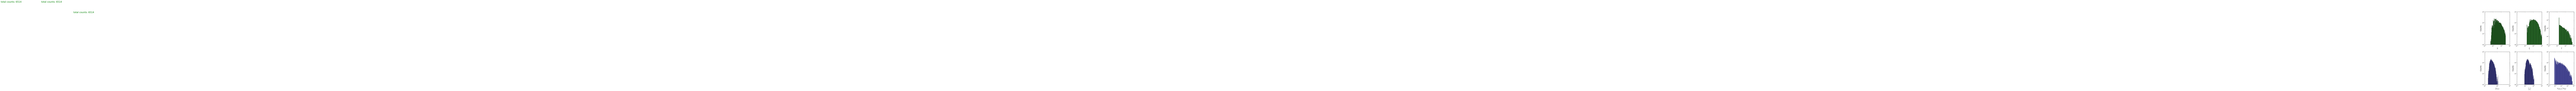

In [66]:
%matplotlib inline
fname=fdir+'x2y4z1r64pm1re4000/Unstra.out2.00000.athdf'
t,data = ath.athdf(fname,quantities=['x1f','x2f','x3f'])
dx=data['x1f'][1]-data['x1f'][0]
dy=data['x2f'][1]-data['x2f'][0]
dz=data['x3f'][1]-data['x3f'][0]
dv = dx*dy*dz

plot_jhist(ncells,jmax,diss,size,orient)

# 128/H

<IPython.core.display.Javascript object>


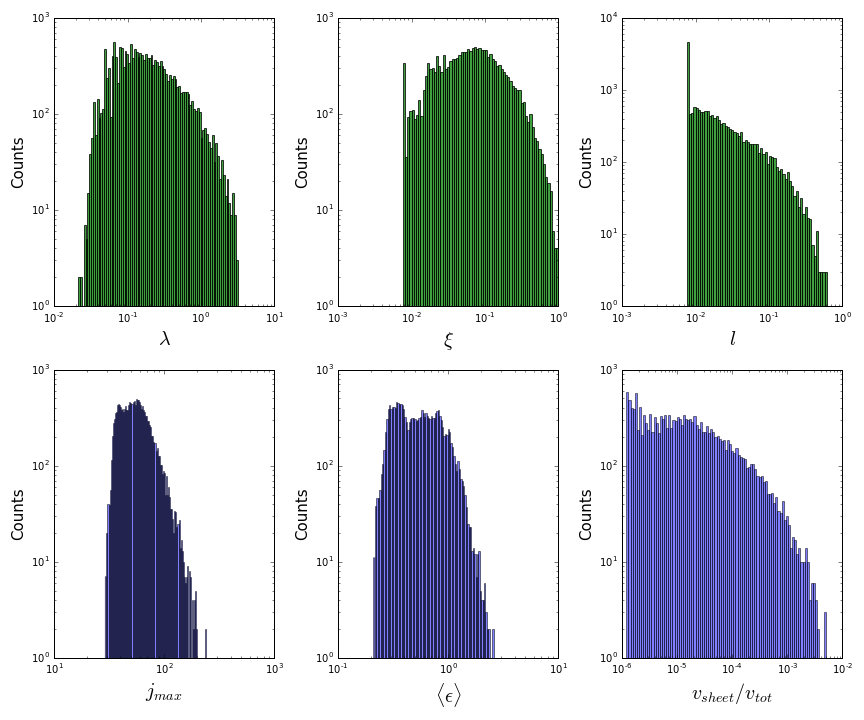

averaged lambda =  0.274642138776
average xi =  0.0987821104256
average l =  0.0311031728751
average j_max =  57.5907375278
average epsilon =  0.589942516621
average v_frac =  0.0237970648872


In [109]:
fdir = '/tigress/jiming/reconnect/athena/bin/'
fname = fdir+'x2y4z1r128pm1re4000/jprop_ts=50_te=101.p'

ncells,jmax,diss,size,orient = pickle.load( open(fname, "rb" ) )
plot_jhist(ncells,jmax,diss,size,orient)

# 256/H

<IPython.core.display.Javascript object>


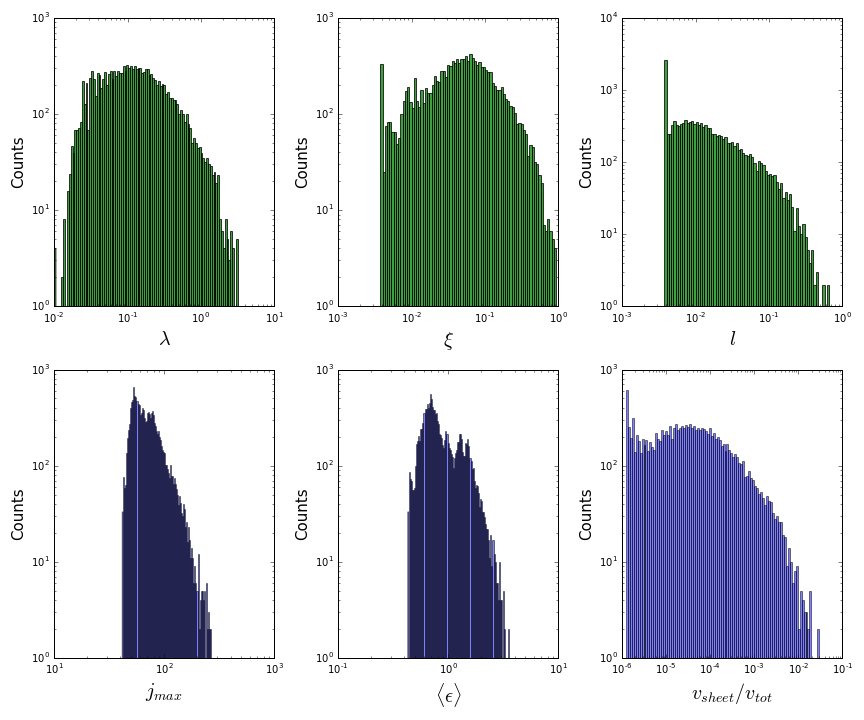

averaged lambda =  0.202657504792
average xi =  0.0772390033341
average l =  0.0234436517462
average j_max =  72.7297651134
average epsilon =  0.930671399882
average v_frac =  0.0672711060539


In [149]:
fdir = '/tigress/jiming/reconnect/athena/bin/'
fname = fdir+'x2y4z1r256pm1re4000/jprop_ts=30_te=51.p'

ncells,jmax,diss,size,orient = pickle.load( open(fname, "rb" ) )
plot_jhist(ncells,jmax,diss,size,orient)

## A few averages
 $\bar{A}\equiv \frac{ \int A dt } {  \int dt}$; $\langle A \rangle \equiv \frac{\int A dv}{\int dv}$
 
 * $\langle\overline\epsilon\rangle_{sh}\simeq 0.259, 0.590,0.931$
 * $\langle \overline{(\lambda,\xi,l)} \rangle \simeq (0.448,0.141,0.048),(0.275,0.099,0.031),(0.202,0.077,0.0234) $
 * $\langle \overline{j_{max}}\rangle\simeq 38.2,57.6,72.7$
 * $\langle \overline{v_{sheet}/v_{tot}}\rangle\simeq 0.00374,0.0238,0.0673$  volume ratio of all sheets and whole box


## Correlations (to be filled up)
### 4.2.3 PDF of Ohmic dissipation ($\epsilon = \int\! dv \,\eta j^2$)
### 4.2.4 PDF of $j_{max} \in $ jsheet
### 4.2.5 PDF of ($\lambda,\xi,l$)
### 4.2.6 Cross-correlation:  $\epsilon \circ j_{max}$, $\lambda\circ\xi$, ..., $\epsilon \circ (\lambda,\xi,l)$, ...

In [162]:
import matplotlib.gridspec as gridspec

def plot_jcorr(ncells,jmax,diss,size,orient):
    nframe = 2
    nplot  = 3
    matplotlib.rcParams['figure.figsize'] = (15, 15.0*nframe/nplot)
    fig = plt.figure()
    fraction=0.046;pad=0.04
    gs = gridspec.GridSpec(2, 3)
    for i in np.arange(6):
      if (i==0):
        hdata_x = np.array(orient)[:,0]
        hdata_y = np.array(orient)[:,1]
        xlab = r'$\hat{\lambda}$'
        ylab = r'$\hat{\xi}$'
        xlim = (-1,1)
        ylim = (-1,1)

      if (i==1):
        hdata_x = np.array(orient)[:,0]
        hdata_y = np.array(orient)[:,2]
        xlab = r'$\hat\lambda$'
        ylab = r'$\hat{l}$'
        xlim = (-1,1)
        ylim = (-1,1)
      if (i==2):
        hdata_x = np.array(orient)[:,1]
        hdata_y = np.array(orient)[:,2]
        xlab = r'$\hat\xi$'
        ylab = r'$\hat{l}$'
        xlim = (-1,1)
        ylim = (-1,1)
      if (i==3):
        hdata_x = np.array(size)[:,0]
        hdata_y = np.array(diss)
        xlab = r'$\lambda$'
        ylab = r'$\langle\epsilon\rangle$'
        xlim = (100,1000)
      if (i==4):
        hdata_x = np.array(size)[:,1]
        hdata_y = np.array(diss)
        xlab = r'$\xi$'
        ylab = r'$\langle\epsilon\rangle$'
        xlim = (1e-4,1.0)
      if (i==5):
        hdata_x = np.array(size)[:,2]
        hdata_y = np.array(diss)
        xlab = r'$l$'
        ylab = r'$\langle\epsilon\rangle$'
        xlim = (1e-4,1.0)
      if (i==6):
        hdata_x = np.array(size)[:,0]*np.array(size)[:,1]*np.array(size)[:,2]
        hdata_y = np.array(diss)
        xlab = r'$\lambda\times\xi\times l$'
        ylab = r'$\langle\epsilon\rangle$'
        xlim = (1e-4,1.0)
      if (i==7):
        hdata_x = np.array(jmax)
        hdata_y = np.array(diss)
        xlab = r'$j_{max}$'
        ylab = r'$\epsilon$'
        xlim = (100,1000)
        
      fig.add_subplot(gs[i])
      ax = plt.gca()
      ax.scatter(hdata_x,hdata_y,s=0.02, marker = '.' );

       # linear regression
      #n_abovezero = np.min([len(hdata_x[hdata_x > 0]),len(hdata_y[hdata_y > 0])])
      #clean_data = np.log10(np.array(zip(hdata_x[:n_abovezero],hdata_y[:n_abovezero])))
      #print clean_data
      #coeff = np.polyfit(clean_data[:,0], clean_data[:,1], 1)
      #print coeff
      #break
      #yfit = 10**(coeff[0]*clean_data[:,0]+coeff[1])
      #ax.plot(clean_data[:,0],yfit,'r-')

      ax.set_xlabel(xlab,size=20)
      ax.set_ylabel(ylab,size=20)
      vmin = np.min(hdata_x)*0.9; vmax = np.max(hdata_x)*1.1
#       if (vmin <= 0):
#         vmin =1e-2
#         if (i==5):
#           vmin =1e-5
#       if (i==3 or i==4):
#         vmin = 5000
#         vmax = 5e5
      ax.set_xlim(vmin,vmax)
      print 'i = ',i,' xmin/xmax = ',vmin,vmax

      vmin = np.min(hdata_y)*0.9; vmax = np.max(hdata_y)*1.1
      if (vmin <= 0):
        vmin =1e-2
        if (i==5):
          vmin =1e-1

      ax.set_ylim(vmin,vmax)
      print 'i = ',i,' ymin/ymax = ',vmin,vmax
      if i>2:
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.axhline(linewidth=8) 
        ax.axvline(linewidth=8) 
      #plt.title(r'$\mathrm{Histogram\ of\ d_i:}$')
    plt.tight_layout()

<IPython.core.display.Javascript object>


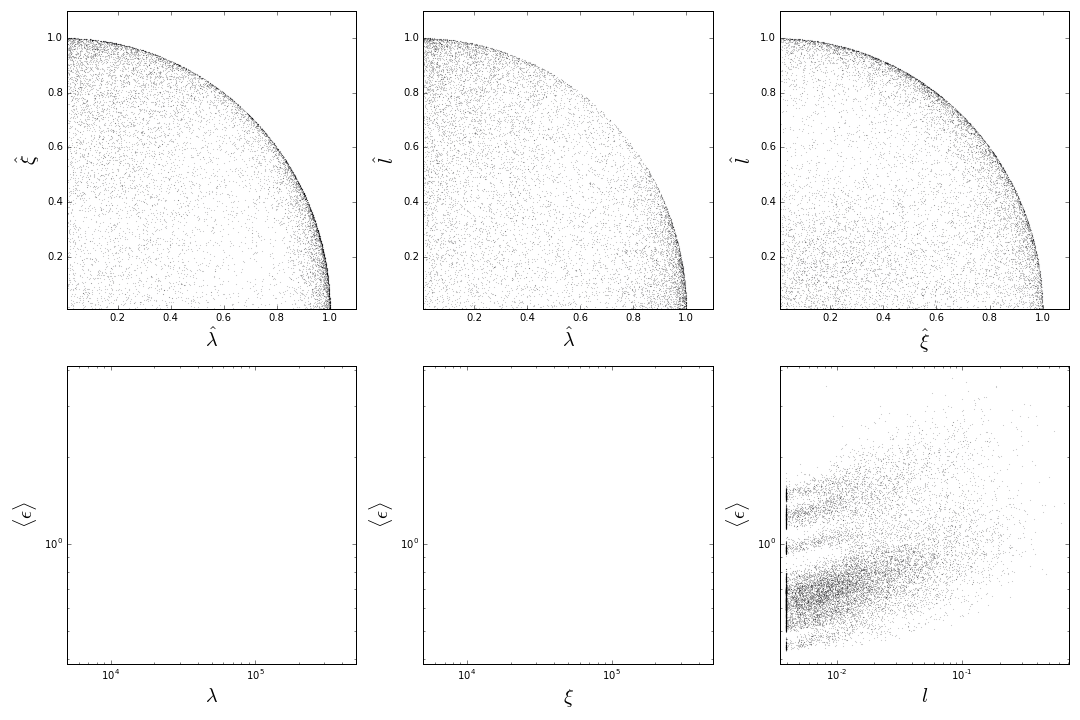

i =  0  xmin/xmax =  0.01 1.1
i =  0  ymin/ymax =  0.01 1.1
i =  1  xmin/xmax =  0.01 1.1
i =  1  ymin/ymax =  0.01 1.1
i =  2  xmin/xmax =  0.01 1.1
i =  2  ymin/ymax =  0.01 1.1
i =  3  xmin/xmax =  5000 500000.0
i =  3  ymin/ymax =  0.386307953529 4.1128929218
i =  4  xmin/xmax =  5000 500000.0
i =  4  ymin/ymax =  0.386307953529 4.1128929218
i =  5  xmin/xmax =  0.003515625 0.718316671048
i =  5  ymin/ymax =  0.386307953529 4.1128929218


In [161]:
plot_jcorr(ncells,jmax,diss,size,orient)

In [119]:
hdata_x = np.array(orient)[:,0]
hdata_y = np.array(orient)[:,2]


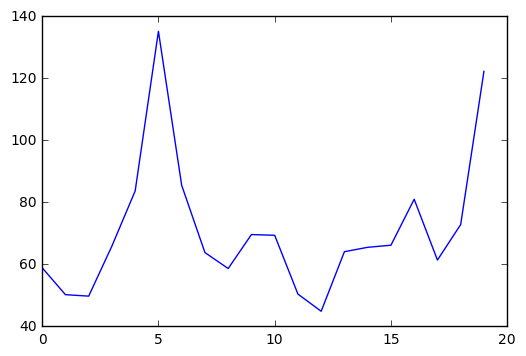

In [5]:
%matplotlib inline
jthlist = [3473,2525,2478,4349,7010,18283,\
           7314,4075,3444,4850,4817,2544,\
           2016,4111,4294,4382,6566,3772,\
           5310, 14952]
plt.plot(np.sqrt(np.array(jthlist)))

In [7]:
np.savetxt('table_test.txt',jthlist,fmt='%.15e %.15e %.15e')

ValueError: fmt has wrong number of % formats:  %.15e %.15e %.15e

In [14]:
f = 'table_test.txt'ut
x = np.array(( -9999, 1.345, -9999, 3.21, 0.13, -9999), dtype=float)
np.savetxt(f, x.reshape(1,6), fmt='%.10e')


In [18]:
fhandle=open(f,'a')
np.savetxt(fhandle, x.reshape(1,6), fmt='%.10e')
np.savetxt(fhandle, x.reshape(1,6), fmt='%.10e')
fhandle.close()

For given time frame(similar procedures applied to vorticity sheets as well):
   
<font size=2>
`python pspec.py x2y4z1r512pm1re16000 25 41 1 &>log.r512.pspec &
python dump_hist2d.py x2y4z1r512pm1re16000 0 51 >& log.r512.hist &
python cdf_jsheet.py x2y4z1r512pm1re16000 30 51 1 >& log.r512.jcdf &
python cdf_vsheet.py x2y4z1r512pm1re16000 30 51 1 >& log.r512.vcdf &
python main.py x2y4z1r512pm1re16000 30 51 1 >& log.r512.jlist &
python main_vsheet.py x2y4z1r512pm1re16000 30 51 1 >& log.r512.vlist &
python get_jsheet_prop.py x2y4z1r512pm1re16000 30 51 1 6.25e-5,8 >& log.r512.jprop &
python get_j_vsheet_prop.py x2y4z1r512pm1re16000 30 51 1 6.25e-5,8 >& log.r512.vprop &`</font>

(0) try compute power spectra and dump the horizontal/vertical averaged hist file from 3d dumps.

(1) estimate the $j_{th}$ the threshold value for any $j$ above $j_{th}$ which account for 25% of the total dissipation.

(2) save threshold value, volume averaged $\langle j^2\rangle$ for the sheet and whole box  ==>  *basename.jth.tab*

(3) individual jlist, which defined as [jsheet1,jsheet2,...] a list of dictionaries, are saved sepratedly for each frame as   *basename.nnnnn.jlist.p*

(4) get jsheet properties(saved as *jprop.nnnnn.p*) such as, 
* number of cells for given jsheet
* peak current density jmax
* dimension [$\lambda\pm\Delta\lambda$, $\xi\pm\Delta\xi$, $l\pm\Delta l$]
* orientation $\vec{P}$, $\langle j^2\rangle_{sh}$
* dissipation rate $\langle\eta j^2\rangle_{sh}$

Average over several frames:

(1) threshold value $j_{th}$ for identifying jsheet in table: *basename.jth.p*

(2) combined properties of jsheets in all frames: *jprop_ts=nn_te=nn.p*

<!---
Basic calling sequence:
python main.py x2y4z1r128pm1re4000 50 101 1         to get jlist
python main_vsheet.py x2y4z1r128pm1re4000 50 101 1  to get vlist
python get_jsheet_prop.py x2y4z1r128pm1re4000 50 101 1 [2.5e-4] [8]  to get jprop
python get_vsheet_prop.py x2y4z1r128pm1re4000 50 101 1 [2.5e-4] [8]  to get vprop
python pspec.py x2y4z1r512pm1re16000 17 18 1        to get powerspectra
!-->

# 1. threshold values and average dissipation rate

* the threshold exhibits big fluctuations which exactly follows the fluctuation of the stress;  an example of itermittency of mri driven turbulence

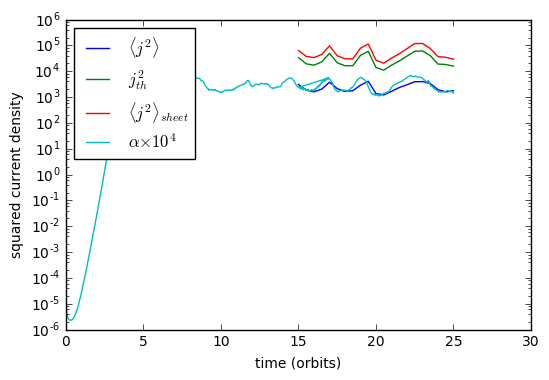

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#import athena4_read as ath
import athena_read as ath
%matplotlib inline

fdir =  '/tigress/jiming/reconnect/athena/bin/'
targ = 'x2y4z1r128pm1re4000/'
targ = 'x2y4z1r256pm1re8000/'
targ = 'x2y4z1r512pm1re16000/'
fname = fdir+targ+'Unstra.out2.jth.tab'


dtype1 = np.dtype([('time', 'f8'), ('jth2', 'f8'),\
                   ('jcs2','f8'),('j2','f8')])
jtab = np.loadtxt(fname, dtype=dtype1)
plt.plot(jtab['time']/2.,jtab['j2'],label=r'$\langle j^2\rangle$')
plt.plot(jtab['time']/2.,jtab['jth2'],label=r'$j^2_{th}$')
plt.plot(jtab['time']/2.,jtab['jcs2'],label=r'$\langle j^2\rangle_{sheet}$')


fname = fdir+targ+'Unstra.hst'
torb = 2.0*np.pi; pres=1; volume=2*4*1.0
dtype1 = np.dtype([('time', 'f8'), ('em1', 'f8'),('em2','f8'),('em3','f8'),('maxwell','f8'),('reynolds','f8')])
ahist = np.loadtxt(fname, dtype=dtype1, skiprows=2, usecols=(0,9,10,11,12,13))
plt.plot(ahist['time']/torb,1e4*(ahist['maxwell']+ahist['reynolds'])\
         /pres/volume,label=r'$\alpha$'+r'$\times 10^4$')

plt.legend(fontsize=12,loc=2)
#plt.xlim([25,50])
plt.yscale('log')
#plt.ylim([100,1e5])
plt.xlabel('time (orbits)')
plt.ylabel('squared current density')

* the ratio $\langle j\rangle /\langle j \rangle_{sheet}$ is insensitive to resolution as long as the dissipation scales are resolved; 

* similarly, the dependence on Rm is also relatively weak

for x2y4z1r64pm1re4000: (<j^2>/<j^2_sheet>) =  0.122598840549
for x2y4z1r128pm1re4000: (<j^2>/<j^2_sheet>) =  0.0949861949071
for x2y4z1r256pm1re4000: (<j^2>/<j^2_sheet>) =  0.0804148228381
for x2y4z1r256pm1re8000: (<j^2>/<j^2_sheet>) =  0.0734426911372
for x2y4z1r512pm1re16000: (<j^2>/<j^2_sheet>) =  0.0470806275077


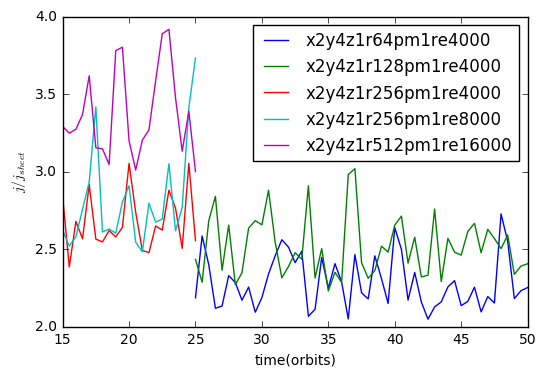

In [23]:
fdir =  '/tigress/jiming/reconnect/athena/bin/'
targlist = ['x2y4z1r64pm1re4000','x2y4z1r128pm1re4000',\
            'x2y4z1r256pm1re4000','x2y4z1r256pm1re8000',\
            'x2y4z1r512pm1re16000']


for targ in targlist:
    fname = fdir+targ+'/Unstra.out2.jth.tab'
    dtype1 = np.dtype([('time', 'f8'), ('jth2', 'f8'),\
                       ('jcs2','f8'),('j2','f8')])
    jtab = np.loadtxt(fname, dtype=dtype1)
    plt.plot(jtab['time']/2.,np.sqrt(jtab['jth2']/jtab['j2']),label=targ)
    print 'for '+targ+': (<j^2>/<j^2_sheet>) = ',\
           (np.average(jtab['j2']/jtab['jcs2']))
plt.xlabel('time(orbits)')
#plt.ylabel(r'$\langle j^2\rangle/\langle j^2\rangle_{sheet}$')
plt.ylabel(r'$j/j_{sheet}$')
plt.legend(fontsize=12,loc=1)

## cumulative distribution of fractional dissipation and volume of current/vorticity sheet

In [177]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#import athena4_read as ath
#import athena_read as ath
#from main import loadData
import yt
%matplotlib inline

fdir =  '/tigress/jiming/reconnect/athena/bin/'
targ = 'x2y4z1r128pm1re4000/'
#targ = 'x2y4z1r256pm1re8000/'
targ = 'x2y4z1r512pm1re16000/'
fname = fdir+targ+'Unstra.out2.00050.athdf'
data=yt.load(fname)

yt : [WARNING  ] 2017-06-01 13:21:37,990 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2017-06-01 13:21:37,991 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2017-06-01 13:21:37,992 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2017-06-01 13:21:37,993 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2017-06-01 13:21:38,010 Parameters: current_time              = 157.079424821
yt : [INFO     ] 2017-06-01 13:21:38,011 Parameters: domain_dimensions         = [1024 1008  512]
yt : [INFO     ] 2017-06-01 13:21:38,012 Parameters: domain_left_edge          = [-1.  -2.  -0.5]
yt : [INFO     ] 2017-06-01 13:21:38,014 Parameters: domain_right_edge         = [ 1.   2.   0.5]
yt : [INFO     ] 2017-06-01 13:21:38,015 Parameters: cosmological_simulation   = 0.0


In [154]:
ad = data.all_data()
vel1 = ad['athena_pp','vel1']
print len(vel1)

8257536


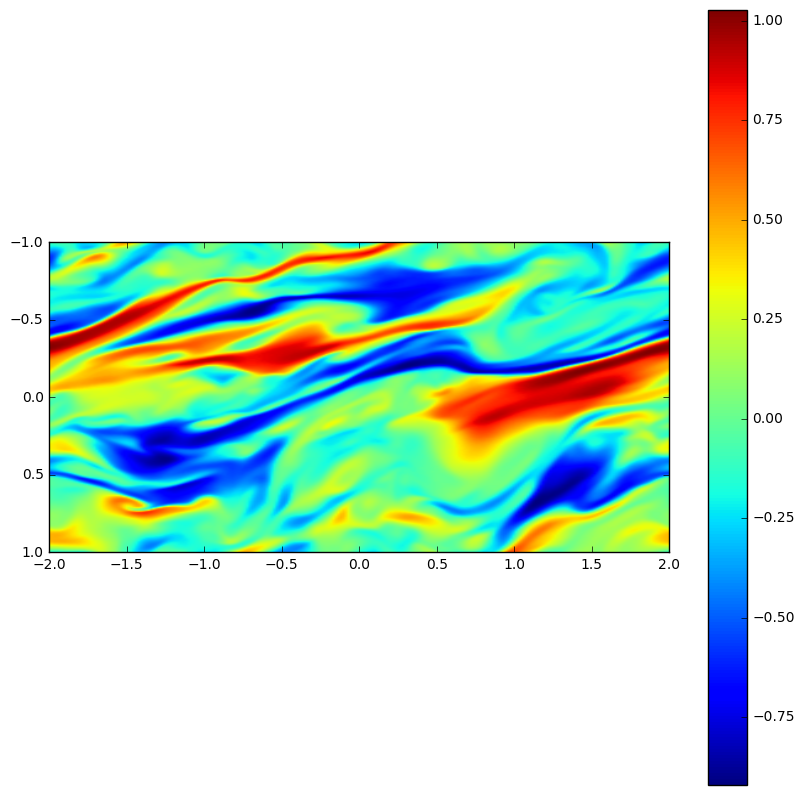

In [107]:
all_data_level_0 = data.covering_grid(level=0, left_edge=[-1,-2,-0.5],dims=data.domain_dimensions)
density = all_data_level_0['Bcc2']
plt.figure(figsize=(10,10))
plt.imshow(density[:,:,64],origin='upper',extent=[-2,2,1,-1])#,vmin=0.5,vmax=1.5)
plt.colorbar()

In [167]:
def current_density(data):
    ad = data.covering_grid(level=0, left_edge=[-1,-2,-0.5],dims=data.domain_dimensions)
    def curl(vx,vy,vz,dx,dy,dz):
        [dxvx,dyvx,dzvx] = np.gradient(vx)               
        [dxvy,dyvy,dzvy] = np.gradient(vy)
        [dxvz,dyvz,dzvz] = np.gradient(vz)               
        cx = dyvz/dy-dzvy/dz
        cy = dzvx/dz-dxvz/dx                             
        cz = dxvy/dx-dyvx/dy 
        return cx**2+cy**2+cz**2
    j2 = curl(ad['Bcc1'],ad['Bcc2'],ad['Bcc3'],ad['dx'],ad['dy'],ad['dz'])
    w2 = curl(ad['vel1'],ad['vel2'],ad['vel3'],ad['dx'],ad['dy'],ad['dz'])
    return j2,w2

In [178]:
j2,w2 = current_density(data)

MemoryError: 

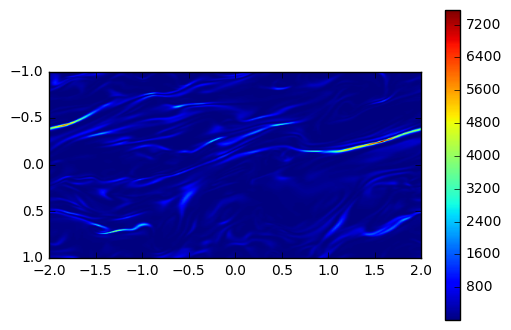

In [171]:
plt.imshow(j2[:,:,64],origin='upper',extent=[-2,2,1,-1])#,vmin=0.5,vmax=1.5)
plt.colorbar()

In [179]:
print np.average(j2)
jth2 = 1.19516e3
print np.average(j2[j2>jth2])
print jth2/np.average(j2)

201.902486191
2048.9693056
5.91949124823


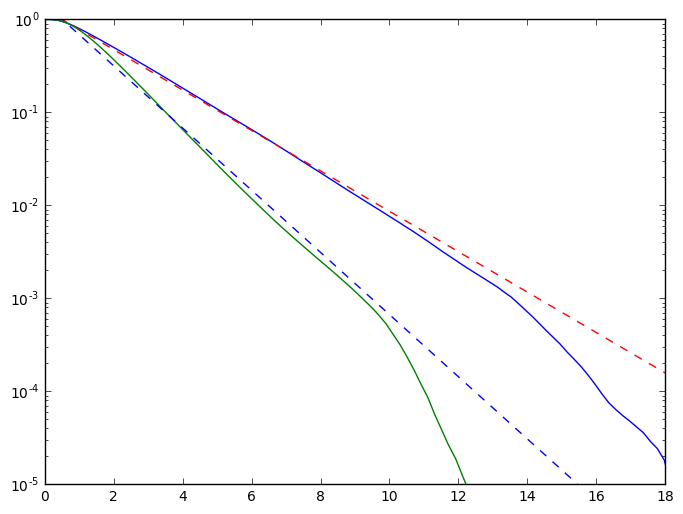

In [211]:
matplotlib.rcParams['figure.figsize'] = (8,6)
fname = 'Unstra.out2.00049.athdf.jcdf.tab'
dtype1 = np.dtype([('jth2', 'f8'), ('cdfj2', 'f8')])
ahist = np.loadtxt(fname, dtype=dtype1, usecols=(0,1))
plt.plot(ahist['jth2']**0.5,ahist['cdfj2'])
plt.yscale('log')
plt.xlim([0,18])
plt.ylim([1e-5,1])
plt.plot(ahist['jth2']**0.5,np.exp(-(ahist['jth2']**0.5-0.5)/2),'r--')

fname = 'Unstra.out2.00033.athdf.vcdf.tab'
dtype1 = np.dtype([('wth2', 'f8'), ('cdfw2', 'f8')])
ahist = np.loadtxt(fname, dtype=dtype1, usecols=(0,1))
plt.plot(ahist['wth2']**0.5,ahist['cdfw2'])
plt.plot(ahist['wth2']**0.5,np.exp(-(ahist['wth2']**0.5-0.5)/1.3),'b--')

In [221]:
print np.count_nonzero(j2)
print np.count_nonzero(j2[j2>10000])

8257536
121


In [222]:
print j2[j2>10000]

[ 10060.36633135  10443.46749393  10887.65535333  10092.38141963
  10435.55050173  10922.1821052   10749.7542245   10285.15198048
  10589.84418581  10098.15684023  10008.92747243  10253.4254106
  11052.07718368  10982.13823907  10126.07098579  10751.19509245
  10933.93439184  10200.90265477  10150.47781302  10442.27594354
  10191.02804067  11640.88205781  10332.19019568  10511.59554298
  11084.70088169  11086.77956699  12226.3265354   11606.40137461
  11893.06919861  11440.09162899  11671.5086054   10876.77484621
  10942.69220942  10371.61656382  10187.42942315  10445.46684761
  10190.91181001  10299.38500327  10763.35116403  10167.9666599
  10983.36941241  10449.91189721  10041.77928583  10603.13581271
  10397.88514283  10349.28011691  10781.42637478  10757.67400034
  11622.72011075  11229.74302763  10048.5979342   10459.37878276
  10686.04153755  12183.30105707  12250.88056506  10732.9527013
  10547.01192856  10422.1432354   10121.95656287  12069.25158063
  12131.19466741  10673.2167